<a href="https://colab.research.google.com/github/jay-thakur/DataScienceTutorial/blob/main/Tensorflow/7_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


# What is Linear Regression?

I hope, we all have seen these equations -

$$Distance = Speed \times Time$$

$$Speed = Acceleration \times Time$$

Let's suppose if we have already some `initialDistance` or `Initial Speed` then can we write the above questions like this - 

$$Distance Traveled = Speed \times Time + Initial Distance$$

$$Speed = Acceleration \times Time + Initial Speed$$

ok. Now Let's take our above `DistanceTraveled` equation.

$$Distance Traveled = Speed \times Time + Initial Distance$$



Let's say 

D = `DistanceTraveled`

S = `Speed`

T = `Time`

d = `InitialDistance`

so our equation will be this - 

$$D = S*T + d$$

Have we seen equation like this before ? Don't remember ? 

mmmmmm... ok. Let me replace `S` to `m`, `T` to `X` & `d` to `c`

Now, How about this ? -

$$y = m*X + c$$

Would you mind if i write like this ?

$$y = mX + c$$

I am sure, we must have encountered this before.

Yes, Yes this is the equation of line (Linear Equation) where `X` is the `independent variable`, `y` is the `dependent variable`, `m` is `slope/gradient` and 'c` is the `intercept`.

In Machine Learning, we call this equation as **Simple Linear Model** where `X` is the input data, `m` and `c` are the parameters we adjust and `y` is the prediction. we also call this **Simple Linear Regression Model**.

Let's understand this by example - 

X data ::
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]

******************



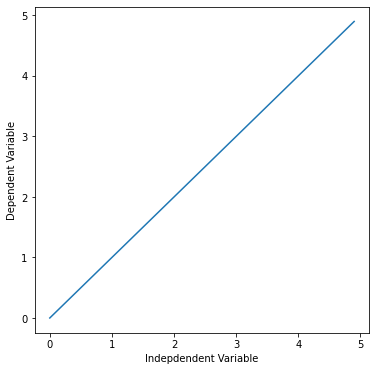

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 6)

X = np.arange(0.0, 5.0, 0.1)
print("X data ::\n", X)

## the slope and intercept
m = 1
c = 0

y = m * X + c 

print("\n******************\n")

plt.plot(X, y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Its a  `straight line`, and by adjusting the **slope** parameter we will change the **angle** between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis. and then use it to predict future values.

But wait!! **What does Regression mean ?** - Regression is a statistical process for estimating the relationship between a dependent variable and one or more independent variable(s).

# So How is Linear Regression performed?

When we want to perform a linear regression, what we will do is fit a simple linear model to the dataset, we adjust the **slope/gradient** and **intercept** parameters to the data the best way possible, Hence closer the model comes to describing each ocurrence, the better it will be at representing them.

### A Surface Level Example
Let's take an example of a data set with one feature and one label.



(0.0, 6.0, 0.0, 20.0)

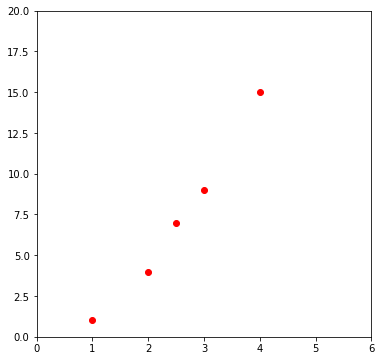

In [44]:
###How it Works

import matplotlib.pyplot as plt
import numpy as np

X = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(X, y, 'ro')
plt.axis([0, 6, 0, 20])

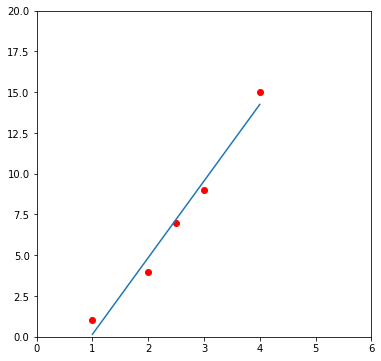

In [45]:
plt.plot(X, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)))
plt.show()

Once we've generated this line for our dataset, we can use its equation to predict future values. We just pass the features of the data point we would like to predict into the equation of the line and use the output as our prediction.

can we guess, **Why this is called as Linear?**. because it assumes that the relationship between dependent variable `y` and independent variable `x` is **LINEAR**.

Generally in Neural Network we use `W` (weights)instead of `m` . and `b` (bias) instead of `c` we will also follow this now onwards.

# Linear Regression with Tensorflow

Let's see first, the steps involved in solving of any machine learning problems.

### Steps to solve Machine Learning Problems

Solving a machine learning problem usually consists of the following steps:

* Obtain training data.
* Define the model.
* Define a loss function.
* Run through the training data, calculating loss from the ideal value
* Calculate gradients for that loss and use an optimizer to adjust the variables to fit the data.
*  Evaluate your results.


### Data points

we will create inputs (usually denoted as`X`) and outputs (usually denoted as `y`, called as `labels`) and Our goal is to learn from paired inputs and outputs so that we can predict the value of an output from an input.

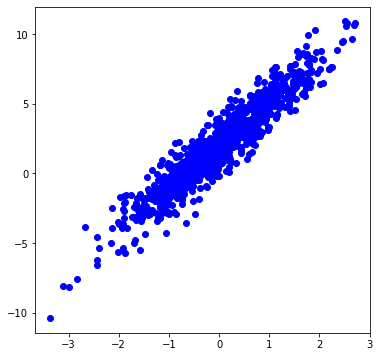

In [46]:
# Let's define True weight and True bias, it's actual line parameters
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise

# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b")
plt.show()

### Define the Model

In [47]:
class MyLinearRegressionModel():
  def __init__(self):
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def predict(self, x):
    return self.w * x + self.b

model = MyLinearRegressionModel()

print("Weight:", model.w)
print("Bias:", model.b)

y_pred = model.predict(3)
print("Predicted Value :: ", y_pred.numpy())

# Let's assert
assert model.predict(3.0).numpy() == 15.0

Weight: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>
Bias: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
Predicted Value ::  15.0


Here, we are passing x = 3, so it should predict, 3*5+0 = 15. If we see Predicted value, it is 15.

### Define Loss Function

A loss function measures how well the output of a model for a given input matches the target output. The goal is to minimize this difference during training. Let's define the **mean squared error** which is also known as the standard **L2 loss**. 

Also Before training the model, let's visualize the loss by plotting the model's prediction(in red) and the training data(in blue).

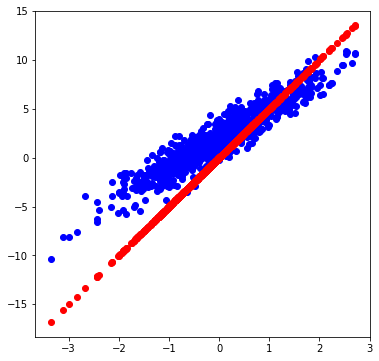

Current loss: 177.974945


In [48]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

plt.scatter(x, y, c="b")
plt.scatter(x, model.predict(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(y, y_pred).numpy())

### Define a Training loop

The training loop consists of repeatedly doing below tasks in order:

* Sending a batch of inputs through the model to generate outputs.
* Calculating the loss by comparing the outputs to the output (or label).
* Using gradient tape to find the gradients.
* Optimizing the variables with those gradients.

In [49]:
# training loop

# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = loss(y, model.predict(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  dw, db = t.gradient(current_loss, [model.w, model.b])

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=4.64 b=0.40, loss=6.00727
Epoch  1: W=4.34 b=0.72, loss=4.28081
Epoch  2: W=4.10 b=0.98, loss=3.15297
Epoch  3: W=3.90 b=1.19, loss=2.41584
Epoch  4: W=3.74 b=1.35, loss=1.93384
Epoch  5: W=3.61 b=1.48, loss=1.61852
Epoch  6: W=3.50 b=1.59, loss=1.41214
Epoch  7: W=3.41 b=1.67, loss=1.27700
Epoch  8: W=3.34 b=1.74, loss=1.18847
Epoch  9: W=3.28 b=1.80, loss=1.13044
Starting: W=3.28 b=1.80, loss=1.13044


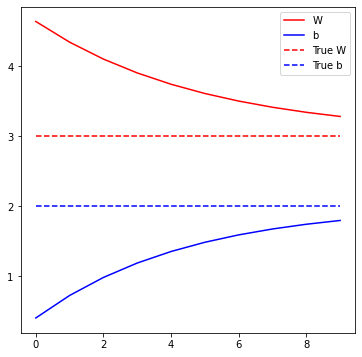

In [50]:
model = MyLinearRegressionModel()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)

# Define a training loop
def training_loop(model, x, y):

  for epoch in epochs:
    # Update the model with the single giant batch
    train(model, x, y, learning_rate=0.1)

    # Track this before I update
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model.predict(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %(epoch, Ws[-1], bs[-1], current_loss))

  print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %(model.w, model.b, loss(y, model.predict(x))))

# Do the training
training_loop(model, x, y)

# Plot it
plt.plot(epochs, Ws, "r", epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

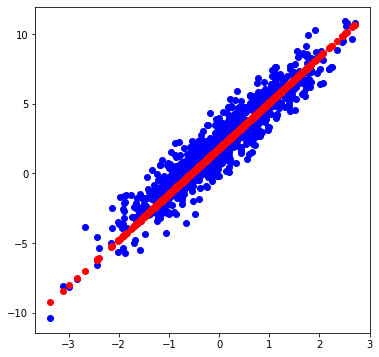

Current loss: 1.130439


In [51]:
# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model.predict(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model.predict(x), y).numpy())

# References

https://www.tensorflow.org/guide/basic_training_loops

https://github.com/farhadkamangar/CSE5368 

https://cognitiveclass.ai/courses/course-v1:BigDataUniversity+ML0120EN+v2
